In [1]:
import ase #atomic simulation environment
import matplotlib.pyplot as plt
import numpy as np

import abtem

# Atomic models

### Atoms (inkl. visualization)

In [2]:
#initialize n2 atom
n2 = ase.Atoms(
    "N2", positions=[(0.0, 0.0, 0.0), (0.0, 0.0, 1.10)], cell=[2, 2, 2], pbc=True)

In [3]:
#atomnummern
n2.numbers

array([7, 7])

In [4]:
#hier output nur 3 Einträge, weil Achsen orthogonal und in xyz-Richtungen
n2.cell

Cell([2.0, 2.0, 2.0])

In [5]:
#enable interactivity -> enable matplotlib backend [VSC -> backend besser "inline", ursprünglich: "ipympl"]
%matplotlib inline

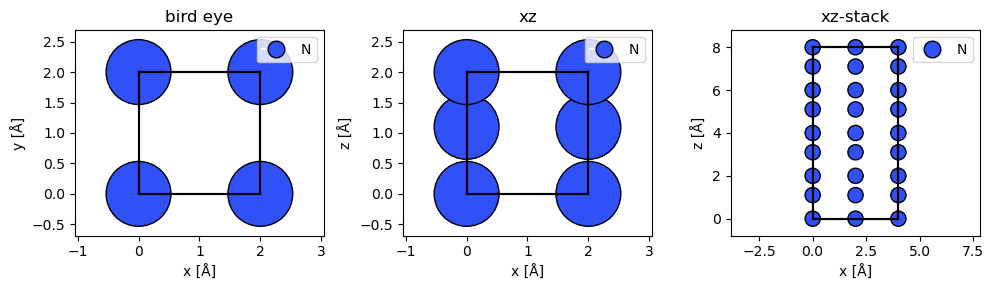

In [6]:
#plot n2 grid (versions)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,3))

abtem.show_atoms(n2, legend=True, show_periodic=True, plane="xy", ax=ax1, title="bird eye")
abtem.show_atoms(n2, legend=True, show_periodic=True, plane="xz", ax=ax2, title="xz")
abtem.show_atoms(n2*(2,2,4), legend=True, show_periodic=True, plane="xz", ax=ax3, title="xz-stack", scale=0.5)
fig.tight_layout();

### Playground

In [7]:
#sonstiges Zeugs, vgl. https://wiki.fysik.dtu.dk/ase/ase/atoms.html#working-with-the-array-methods-of-atoms-objects
n2.set_cell(2 * np.identity(3))
n2.get_cell()

Cell([2.0, 2.0, 2.0])

In [33]:
atomobject = ase.Atoms("NCB")

In [9]:
atomobject.numbers

array([7, 6, 5])

In [10]:
atomobject.set_positions([(0,0,0),(0.25,0.25,0.25),(0.75,0.75,0.75)])

ao1 = atomobject
ao2 = atomobject.copy()
ao3 = atomobject.copy()

(<Figure size 300x300 with 1 Axes>, <Axes: xlabel='x [Å]', ylabel='y [Å]'>)

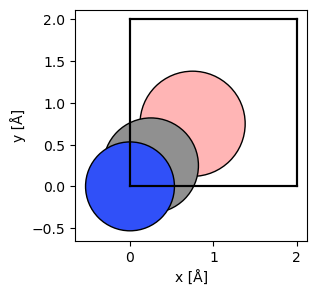

In [37]:
abtem.show_atoms(ao1, figsize=(3,3))

In [11]:
#test effect of scale_atoms=False/True -> see plots below
ao1.set_cell(2 * np.identity(3))
ao2.set_cell(2 * np.identity(3), scale_atoms=True)

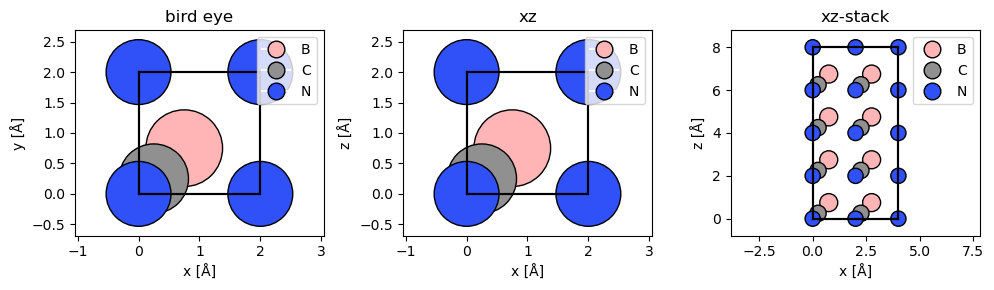

In [12]:
#plot ao1 grid (versions)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,3))

abtem.show_atoms(ao1, legend=True, show_periodic=True, plane="xy", ax=ax1, title="bird eye")
abtem.show_atoms(ao1, legend=True, show_periodic=True, plane="xz", ax=ax2, title="xz")
abtem.show_atoms(ao1*(2,2,4), legend=True, show_periodic=True, plane="xz", ax=ax3, title="xz-stack", scale=0.5)
fig.tight_layout();

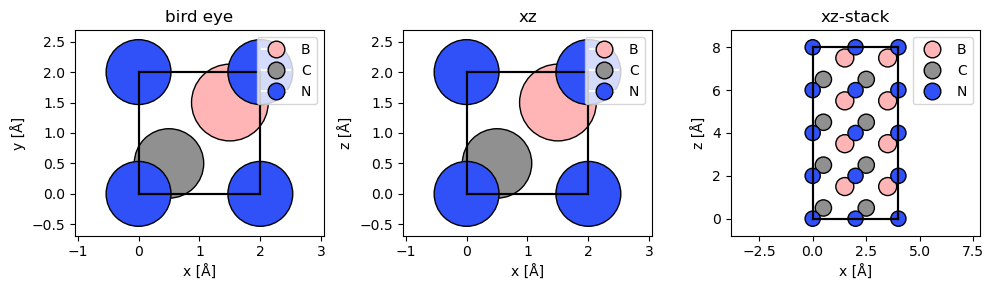

In [13]:
#when scale_atoms=True bei atomobject.set_cell

#plot ao3 grid (versions)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,3))

abtem.show_atoms(ao2, legend=True, show_periodic=True, plane="xy", ax=ax1, title="bird eye")
abtem.show_atoms(ao2, legend=True, show_periodic=True, plane="xz", ax=ax2, title="xz")
abtem.show_atoms(ao2*(2,2,4), legend=True, show_periodic=True, plane="xz", ax=ax3, title="xz-stack", scale=0.5)
fig.tight_layout();

In [40]:
ao2.get_positions()

array([[0. , 0. , 0. ],
       [0.5, 0.5, 0.5],
       [1.5, 1.5, 1.5]])

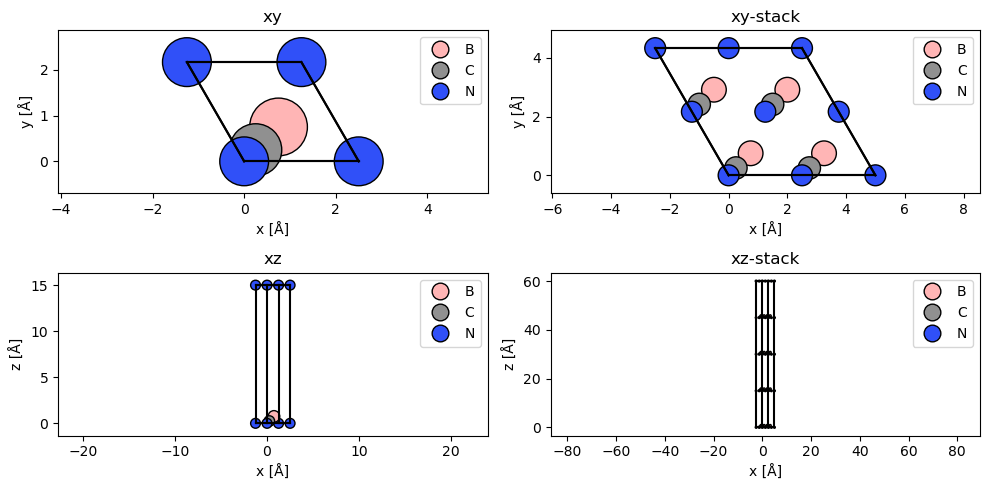

In [14]:
#hexagonal unit cell
#first 3 numbers: legths of basisvectors[°A]; last 3 numbers: angles [degree] in following order: [len(a), len(b), len(c), angle(b,c), angle(a,c), angle(a,b)]
ao3.cell = [2.5, 2.5, 15, 90, 90, 120]
ao3.set_pbc((True, True, True))

#plot ao2 grid (versions)
fig, axs = plt.subplots(2,2, figsize=(10,5))

abtem.show_atoms(ao3, legend=True, show_periodic=True, plane="xy", ax=axs[0,0], title="xy")
abtem.show_atoms(ao3*(2,2,4), legend=True, show_periodic=True, plane="xy", ax=axs[0,1], title="xy-stack", scale=0.5)

abtem.show_atoms(ao3, legend=True, show_periodic=True, plane="xz", ax=axs[1,0], title="xz")
abtem.show_atoms(ao3*(2,2,4), legend=True, show_periodic=True, plane="xz", ax=axs[1,1], title="xz-stack", scale=0.5)
fig.tight_layout();

In [15]:
#from ase.calculators.abinit import Abinit

In [16]:
#calculator braucht noch positional argruments: profile & directory (?) -> wannanders schauen..
#chosen_calculator = Abinit()
#for more see:https://wiki.fysik.dtu.dk/ase/ase/calculators/calculators.html#module-ase.calculators

#calcatoms = ase.Atoms('Fe3', 2*np.identity(3))
#calcatoms.calc = chosen_calculator
#calcatoms.get_potential_energy()

### Import/Export

In [17]:
#z.B. von .cif file strontium titanate 

#? Datenbank ? + oben: perodic boundary conditions? (evtl ausprobieren)

#srtio3 = ase.io.read("./data/SrTiO3.cif")
#ase.io.write("./data/SrTiO3.cif", srtio3)

# Potentials

### Introduction

In [18]:
from abtem.parametrizations import LobatoParametrization
from ase.io import read

abtem.config.set({"local_diagnostics.progress_bar": False});

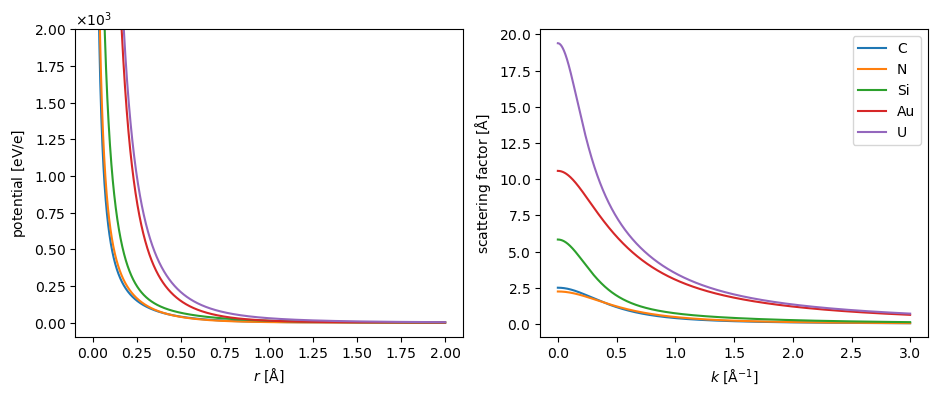

In [19]:
symbols = ["C", "N", "Si", "Au", "U"]

parametrization = LobatoParametrization()

potentials = parametrization.line_profiles(symbols, cutoff=2, name="potential")
scattering_factor = parametrization.line_profiles(symbols, cutoff=3, name="scattering_factor")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))
visualization = potentials.show(ax=ax1, legend=False)
visualization.set_ylim([-1e2, 2e3])

scattering_factor.show(legend=True, ax=ax2);

### Testing & Computing the potential

In [20]:
#test on hexaconal structure:
atoms = ase.Atoms(['N'])
atoms.cell = [2.5, 2.5, 2.5, 90, 90, 120]
structure = atoms*(5,5,6)

#note: sampling=sampling in xy Ebene, slice thickness in z/beam-direction
potential = abtem.Potential(structure, sampling=0.05, parametrization='lobato', slice_thickness=0.5, projection='finite')
len(potential)

30

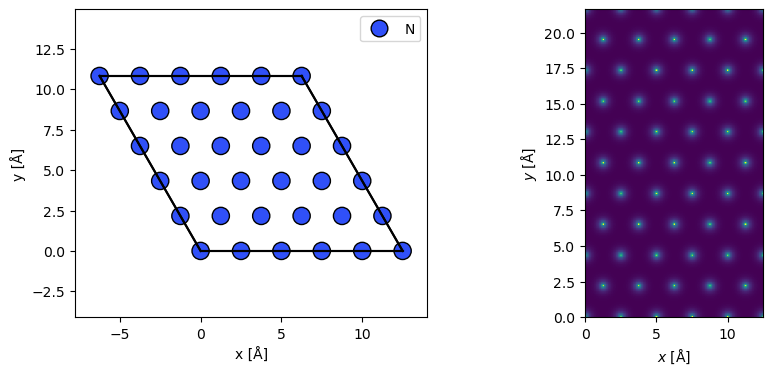

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

abtem.show_atoms(structure, ax=ax1, legend=True, plane='xy', show_periodic=True)
#0.1 is thicknes (of what? probe?)
visualization = (potential.build()*0.1).show(ax=ax2);

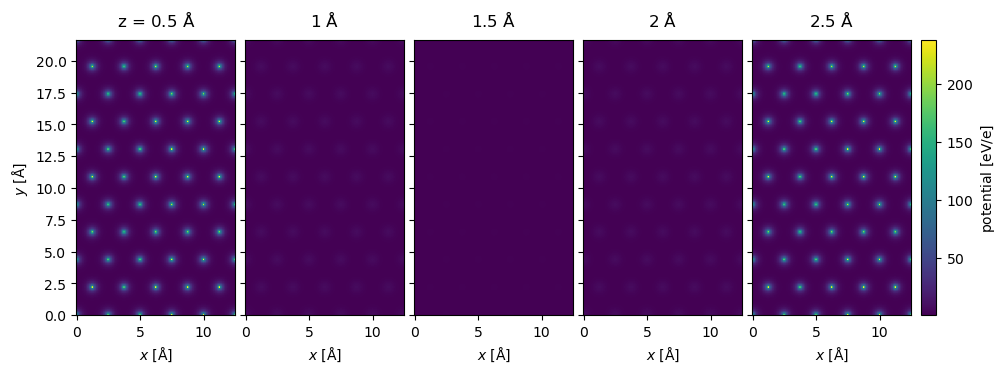

In [22]:
visualization = potential[:5].show(
    project=False,
    explode=True,
    figsize=(11,4),
    common_color_scale=True, #->gemeinsame Farbskala, d.h. wenn off -> auch schwache unterschiede sichtbar
    cbar=True,
)

### Saving & Storing

In [23]:
#saving the potential -> store/precalculate, f.e. if multiple needed multiple times
potential_array = (potential.build()).compute()

#shape of potenial: (slice, x, y)
potential_array.shape

(30, 250, 434)

In [24]:
#storing the potential in Zarr file
#Zarr is a file storage format for chunked, compressed, N-dimensional arrays based on an open-source specification.
potential_array.to_zarr("data/potential_array.zarr", overwrite=True)

abtem.from_zarr("data/potential_array.zarr");

### Infinite Projections

In [25]:
#test on hexaconal structure:
atoms = ase.Atoms(['N'])
atoms.cell = [2.5, 2.5, 2, 90, 90, 120]
structure = atoms*(5,5,6)

#note: sampling=sampling in xy Ebene, slice thickness in z/beam-direction
potential_inf = abtem.Potential(structure, sampling=0.05, parametrization='lobato', slice_thickness=0.5, projection='infinite')
len(potential)

30

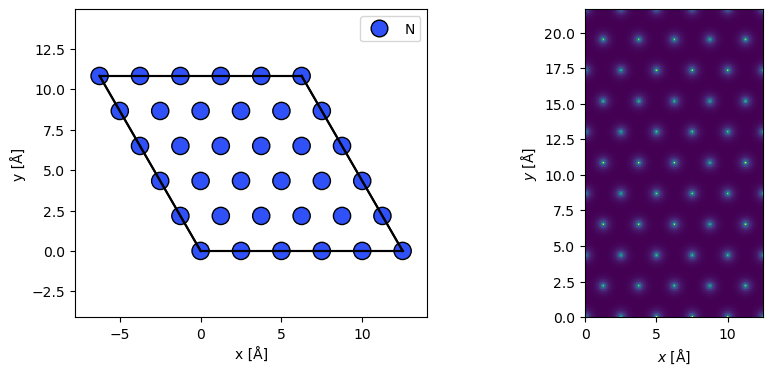

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

abtem.show_atoms(structure, ax=ax1, legend=True, plane='xy', show_periodic=True)
#0.1 is thicknes (of what? probe?)
visualization = (potential_inf.build()*0.1).show(ax=ax2);

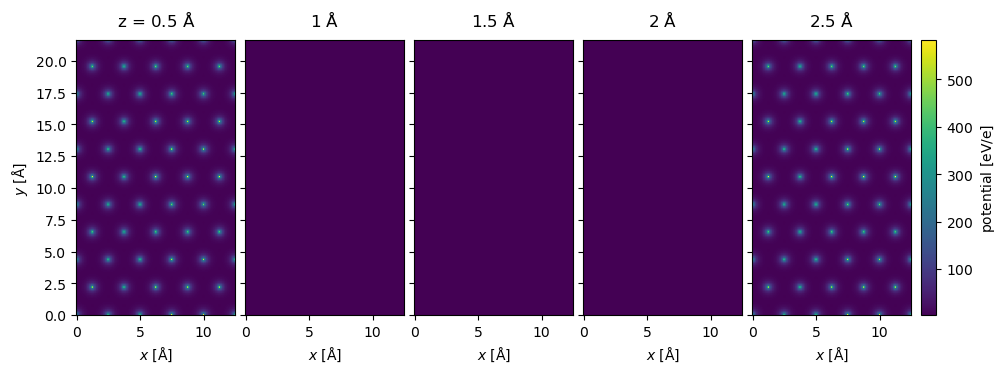

In [27]:
visualization = potential_inf[:5].show(
    project=False,
    explode=True,
    figsize=(11,4),
    common_color_scale=True, #->gemeinsame Farbskala, d.h. wenn off -> auch schwache unterschiede sichtbar
    cbar=True,
)

#man sieht: Atompotential jeweils einer slice zugeordnet. 
#anmerkung: zur besseren Sichtbarmachung im vgl zu oben Z-Vektor der Einheitszelle auf 2°A "gekürzt.. bei 2.5 -> 4 leere Bilder

In [28]:
%timeit (potential.build()).compute()

KeyboardInterrupt: 

In [ ]:
%timeit (potential_inf.build()).compute()

### Potential periodisch fortsetzen

In [ ]:
#für größere Objekte, oder falls doch für jeden run neues Pot kreiiert werden soll [...] eher HRTEM, CBED
periodic_pot = abtem.CrystalPotential(potential_unit=potential_inf, repetitions=(5,5,5), seeds=None)
periodic_pot.shape
#periodic_pot.build().array
#crystal_potential.build().compute()

# Wave functions

abTEM defines three types of wave functions:\
    - PlaneWave: Simulate HRTEM, SAED or other imaging modes with parallel-beam plane wave illumination.\
    - Probe: Simulate CBED, STEM or other imaging modes with a converged electron beam.\
    - Waves: Defines any custom wave function. PlaneWave and Probe can be converted to Waves.


### Probe

In [ ]:
# "We create a probe with a sampling of 0.05 Å, an extent of 20 Å, an energy of 80 keV, a convergence semiangle (semiangle_cutoff) of 30 mrad (fehler? 20),
# a defocus (C10; note the common negative sign convention here) of 50 Å and spherical aberration (Cs) of -50 mikrometer (note the conversion to mikrometer
# and then to Å).

probe = abtem.Probe(
    sampling=0.05, 
    extent=20, #ausdehnung der Welle?
    energy=80e3,
    semiangle_cutoff=20,
    C10=50,
    Cs=-50e-6 * 1e10)
    
#alternativ zu sampling auch mit gpts & extent möglich,vgl:

#probe_focal_series = abtem.Probe(
 #   gpts=256,
  #  extent=25,
   # energy=80e3,
    #semiangle_cutoff=30,
    #defocus=defocus_series)

In [ ]:
#visualization of measurable quantities: intensity and probe phase
intensity = probe.build().intensity().compute()
phase = probe.build().phase() # wieso kein compute?

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,4))
intensity.show(ax=ax1, cbar=True)
#ax1.set_xlim(7,13)
#ax1.set_ylim(7,13)
phase.show(ax=ax2, cbar=True)

plt.tight_layout()

In [ ]:
#oder:
lineprofile = intensity.interpolate_line_at_position(center=(10,10), extent=20, angle=0)
lineprofile.show()


In [ ]:
#fwhm
fwhm = lineprofile.width(height=0.5)
print(f"FWHM is: {fwhm:.4f}")

In [ ]:
#diffraction pattern
diff_pattern = probe.build().diffraction_patterns(max_angle = 600) #angle in mrad

diff_pattern.show(cbar=True, title="reciprocal space probe intensity")
#diff_pattern.show(cbar=True, title="reciprocal space probe intensity", units="mrad")

### Wave function ensembles

In [ ]:
#creating series of probes with variing defoci ->  The last two dimensions of Waves represent the spatial dimensions, 
#which are the mandatory or base dimensions of the object. Any preceeding dimension is an optional ensemble dimension. 
#The ensemble dimensions may represent a range of defocii, positions, frozen phonons, tilt and more.

defocus_series = np.linspace(0, 100, 10)

probe_focal_series = abtem.Probe(
    gpts=256,
    extent=25,
    energy=80e3,
    semiangle_cutoff=30,
    defocus=defocus_series,
)

waves_focal_series = probe_focal_series.build().compute()
waves_focal_series.shape

In [ ]:
#get information
waves_focal_series.axes_metadata

In [ ]:
#fix, axs = plt.subplots(2,5, figsize=(11,6))

#klappt noch nicht
#for i in range(5):
#    waves_focal_series[i*2].show(ax=axs[0,i])
    
#for j in range(5):
#    waves_focal_series[j*2].show(ax=axs[1,j])

#übergangslösung:
#waves_focal_series[::2].show(explode=True, figsize=(11, 3))
waves_focal_series[::2].show(explode=True, figsize=(11, 3), common_color_scale=True, cbar=True)

weiter bei:\
-wave functions ganz unten...\
-weiteres -> evtl neues notebook?\
-nachmittag nochmal STEM Funktion genauer anschauen.


In [ ]:
line_profiles = waves_focal_series[::2].intensity().interpolate_line_at_position(center=(12.5, 12.5), angle=0, extent=10)
#? welche bedeutung hat center hier? Variation ändert Bilder enorm..
#doc says: center (two float) – Center position of the line [Å]. May be given as an Atom.

visualization = line_profiles.show(explode=True, figsize=(11, 2.5), common_scale=True);


In [ ]:
#scanning (?) - mal volllständigkeitshalber... vorsicht bei .compute() wegen Speicher..
#scan = abtem.GridScan()
#waves_focal_series_scanned = probe_focal_series.build(scan=scan)
#waves_focal_series_scanned.array